This notebook is created on **28.July.2023** for the final project of **Artificial Intelligence in UE and Bots Implementation**.
Our group members are:
 - Haozhe TANG
 - Julie jynette JOSEPH
 - Yuanyuan LIU

# Brief-introduction to the Chatbot


**Meet "Granny's Advice" - Your Virtual Grandma Chatbot!**

Need warm words and sage advice? Granny's Advice is here! This rule-based chatbot offers love, care, and guidance like a real grandma. Whether you're feeling down or need a friend, Granny's Advice is your virtual companion, ready to bring a smile to your face with heartfelt responses. You're never alone with Granny's Advice by your side!

# Decision Tree of the Chatbot

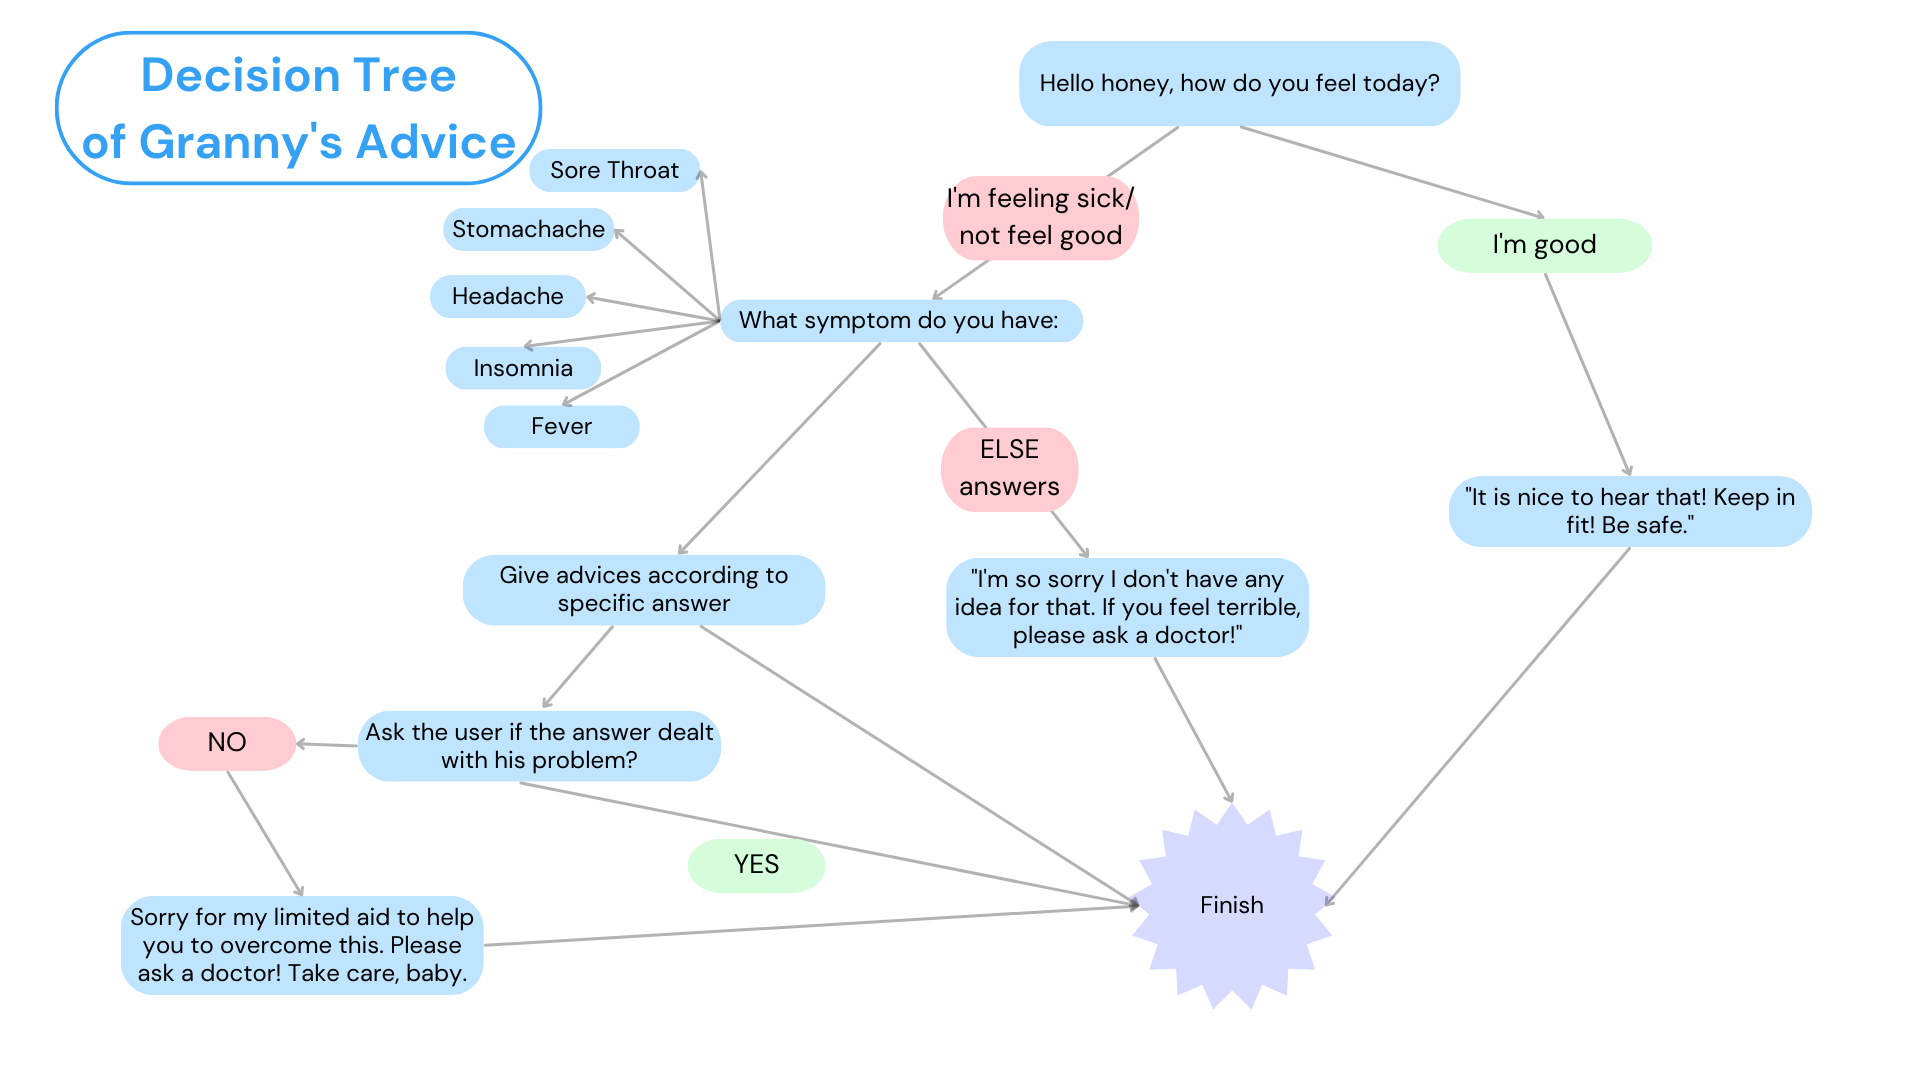

# 1. Library Importing

In [1]:
import spacy
import numpy as np
import time
! python -q -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

2023-08-04 20:49:51.314395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


# 2. Symptoms and resonses setting

In [ ]:
symptoms_check = {
    'sore_throat': ['throat', 'swallow', 'voice', 'neck', 'talk'],
    'general_discomfort': ['malaise', 'fatigue', 'tiredness', 'exhaustion', 'weariness', 'weakness', 'lethargy'],
    'stomach_issues': ['stomach', 'nausea', 'vomiting', 'diarrhea', 'constipation', 'stomachache', 'indigestion', 'upset stomach', 'heartburn', 'bloating', 'gas', 'cramps'],
    'headache': ['head', 'shake', 'pulsating', 'dizzy', 'headache'],
    'respiratory_issues': ['wheezing', 'breath', 'chest tightness', 'chest pain'],
    'insomnia': ['sleep', 'bed', 'asleep', 'night', 'anxiety', 'day', 'depression', 'irritability', 'wake'],
    'fever': ['heat', 'forehead', 'dizzy', 'fever']
}

# Define responses for each category
responses = {
    'score_throat': "Maybe you have a sore thoart honey, but don't worry, gargle with warm salt water or use ice chips. Cold liquids or popsicles can numb the pain.",
    'general_discomfort': "It sounds like you're not feeling well in general. Rest and hydration are usually helpful, but please see a healthcare professional if symptoms persist.",
    'stomach_issues': "You're having some digestive issues. Try bland foods and drink lots of water, but if these symptoms continue, please consult a healthcare provider.",
    'headache': "It sounds that you have a headache, I am so sorry for you... Rest in a quiet, dark room. Hot or cold compresses to your head or neck. You will fell better.",
    'respiratory_issues': "You seem to be having respiratory issues. If these symptoms persist or worsen, it's important to seek medical help.",
    'insomnia': "Stick to a sleep schedule. Keep your bedtime and wake time consistent from day to day, including on weekends. If it still not working, take some pills honey.",
    'fever': "Take paracetamol or ibuprofen in appropriate doses to help bring your temperature down."
}

# 3. Functions to support the Chatbot

In [97]:
#Function to find the most similar symptom(s).
def find_most_similar(word, entity_list, threshold):

    # Compute the similarity score between the word and the entities
    sim = dict()
    for entity in entity_list:
      sim_symptoms = nlp(word).similarity(nlp(" ".join(entity_list[entity])))
      sim[entity] = sim_symptoms

    # Remove the least similar entities
    most_similar = {key: value for key, value in sim.items() if value > threshold}
    # If the word has similarity with some entities ...
    if most_similar:
        return list(most_similar.keys())
    # If no similar words, return None value.
    else:
        return None


#Specify the symptom of patient.
def extract_symptoms(sentence, threshold):
    # Removing capital letters
    doc = nlp(sentence.lower())
    symptoms = []
    for token in doc:
      # Removing stopwords and punctuation
      if not(token.is_stop) and not(token.is_punct):
          # Find the most similar symptom
          symptom = find_most_similar(token.lemma_, symptoms_check, threshold) #list of symptoms
          if symptom:
            symptoms.append(symptom)
    return symptoms

# 4. Main function and flow control

In [118]:
def main(symptoms, threshold):
  welcome = '''
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ||                                                    ||
  ||    Welcome to Granny's Advice health consultant.   ||
  ||                                                    ||
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||

  '''
  print(welcome)
  while True:
      # Analysis of the user's symptoms
      entry_response = input('Hey honey, are you feeling good? \n')
      if entry_response.lower() == 'yes':
        print('Answer Generating.',end='')
        time.sleep(0.5)
        print('.',end='')
        time.sleep(0.5)
        print('.')
        time.sleep(0.5)
        print('\nI am here for you when you need me, my dear~ See you!')
        break
      elif entry_response.lower() == 'no':
        print('Answer Generating.',end='')
        time.sleep(0.5)
        print('.',end='')
        time.sleep(0.5)
        print('.')
        time.sleep(0.5)
        user_input = input("What are your symptoms ? : ")
        symptoms = extract_symptoms(user_input, threshold)
        # If the user does not have any symptoms, the chatbot ends the conversation
        if not symptoms:
          print('Answer Generating.',end='')
          time.sleep(0.5)
          print('.',end='')
          time.sleep(0.5)
          print('.')
          time.sleep(0.5)
          print("I don't get what do you mean, honey... Can you describe it more specifically?\n")
          print("I'm so sorry I don't have any idea for that. If you feel terrible, please ask a doctor!")
          time.sleep(2)
          continue

        # Otherwise, the chatbot asks the user to confirm their symptoms
        else:
          for i, s in enumerate(symptoms[0]):
            if i+1 != len(symptoms[0]):
              answer = input("\nDo you have the\n" +  s + "? [yes/no] : \n")
              if answer.lower() == 'yes':
                print('Answer Generating.',end='')
                time.sleep(0.5)
                print('.',end='')
                time.sleep(0.5)
                print('.')
                time.sleep(0.5)
                print(responses[s])

              # If user input 'NO' for this illness.
              elif answer.lower() == 'no':
                print('Answer Generating.',end='')
                time.sleep(0.5)
                print('.',end='')
                time.sleep(0.5)
                print('.')
                time.sleep(0.5)
                print('I think you are fine with', s, "consult a doctor to make sure, dear~")

              print('\nAnd...')
              time.sleep(1)
              continue
            else:
              answer = input("\nDo you have the\n" +  s + "? [yes/no] : \n")
              if answer.lower() == 'yes':
                print('Answer Generating.',end='')
                time.sleep(0.5)
                print('.',end='')
                time.sleep(0.5)
                print('.')
                time.sleep(0.5)
                print(responses[s])

              elif answer.lower() == 'no':
                print('Answer Generating.',end='')
                time.sleep(0.5)
                print('.',end='')
                time.sleep(0.5)
                print('.')
                time.sleep(0.5)
                print('I think you are fine with', s, "consult a doctor to make sure, dear~")
              print('I am always here for you when you need me, my dear~ See you!')
          break
      else:
        print('Answer Generating.',end='')
        time.sleep(0.5)
        print('.',end='')
        time.sleep(0.5)
        print('.')
        time.sleep(0.5)
        print('I do not understand what does it means, please input again!')
        time.sleep(1)
        continue


# 5. Testings

In [119]:
# Entry question
symptoms = []
threshold = 0.7

main(symptoms, threshold)


  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ||                                                    ||
  ||    Welcome to Granny's Advice health consultant.   ||
  ||                                                    ||
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  
  
Hey honey, are you feeling good? 
yes
Answer Generating...

I am here for you when you need me, my dear~ See you!


In [120]:
# Typos testing and general Q&A testing.
symptoms = []
threshold = 0.6

main(symptoms, threshold)


  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ||                                                    ||
  ||    Welcome to Granny's Advice health consultant.   ||
  ||                                                    ||
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  
  
Hey honey, are you feeling good? 
no
Answer Generating...
What are your symptoms ? : asdf


<ipython-input-97-5f135fd6496a>:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim_symptoms = nlp(word).similarity(nlp(" ".join(entity_list[entity])))


Answer Generating...
I don't get what do you mean, honey... Can you describe it more specifically?

I'm so sorry I don't have any idea for that. If you feel terrible, please ask a doctor!
Hey honey, are you feeling good? 
I feel so sleepy
Answer Generating...
I do not understand what does it means, please input again!
Hey honey, are you feeling good? 
no
Answer Generating...
What are your symptoms ? : I feel so sleepy

Do you have the
insomnia? [yes/no] : 
yes
Answer Generating...
Stick to a sleep schedule. Keep your bedtime and wake time consistent from day to day, including on weekends. If it still not working, take some pills honey.
I am always here for you when you need me, my dear~ See you!


In [121]:
# Complex sentence and mutiple possibilities check
symptoms = []
threshold = 0.6

main(symptoms, threshold)


  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ||                                                    ||
  ||    Welcome to Granny's Advice health consultant.   ||
  ||                                                    ||
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  
  
Hey honey, are you feeling good? 
no
Answer Generating...
What are your symptoms ? : So hot on my forehead.

Do you have the
sore_throat? [yes/no] : 
no
Answer Generating...
I think you are fine with sore_throat consult a doctor to make sure, dear~

And...

Do you have the
headache? [yes/no] : 
yes
Answer Generating...
It sounds that you have a headache, I am so sorry for you... Rest in a quiet, dark room. Hot or cold compresses to your head or neck. You will fell better.

And...

Do you have the
respiratory_issues? [yes/no] : 
no
Answer Generating...
I think you are fine with respiratory_issues consult a doctor to make sure, dear~
I am always here for you when you need me, my dear~ See yo

# Copyright

## <h3 align="center"> ©\ 07.2023. All rights reserved. <h3/>